In [ ]:
!pip install neuron

In [ ]:
from neuron import h
from neuron.units import ms, mV, um
from scipy.signal import find_peaks
#import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
#output_notebook()
import textwrap
import csv
import numpy as np
import math
h.load_file('stdrun.hoc')


1.0

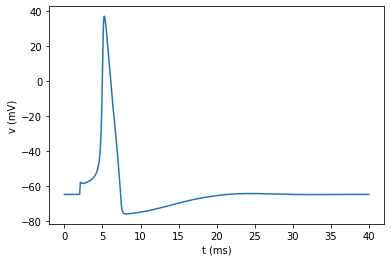

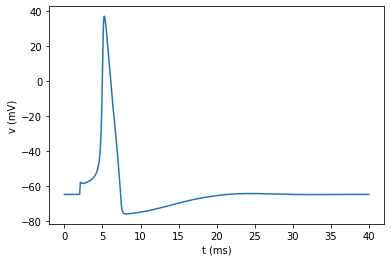

In [ ]:
soma = h.Section(name='soma')
#h.topology()
#soma.psection()
#soma.psection()['morphology']['L']
soma.L = 20
soma.diam = 20
#dir(soma)
#print(textwrap.fill(', '.join(dir(h))))
#help(soma.connect)
#?soma.connect
soma.insert('hh')
#print("type(soma) = {}".format(type(soma)))
#print("type(soma(0.5)) = {}".format(type(soma(0.5))))
mech = soma(0.5).hh
#print(dir(mech))
#print(mech.gkbar)
#print(soma(0.5).hh.gkbar)
iclamp = h.IClamp(soma(0.5))
#print([item for item in dir(iclamp) if not item.startswith('__')])
iclamp.delay = 2
iclamp.dur = 0.1
iclamp.amp = 0.9
#soma.psection()
v = h.Vector().record(soma(0.5)._ref_v)             # Membrane potential vector
t = h.Vector().record(h._ref_t)                     # Time stamp vector
h.finitialize(-65 * mV)
h.continuerun(40 * ms)

plt.figure()
plt.plot(t, v)
plt.xlabel('t (ms)')
plt.ylabel('v (mV)')
plt.show()

with open('data.csv', 'w') as f:
    csv.writer(f).writerows(zip(t, v))


with open('data.csv') as f:
    reader = csv.reader(f)
    tnew, vnew = zip(*[[float(val) for val in row] for row in reader if row])

plt.figure()
plt.plot(tnew, vnew)
plt.xlabel('t (ms)')
plt.ylabel('v (mV)')
plt.show()

In [ ]:
axon1 = h.Section(name = 'axon1')
axon2 = h.Section(name = 'axon2')
axon1.diam = 10 * um
axon2.diam = 20 * um
axon1.L = 5000 * um                      # Hopefully these are in mm
axon2.L = 5000 * um                      # Hopefully these are in mm
axon1.nseg = 1000
axon2.nseg = 1000

axon1.insert("hh")
axon2.insert("hh")
print(axon1.L)

5000.0


In [ ]:
Rm = 40000   # Ohm * cm^2
Ra = 200     # Ohm * cm
lambda1 = math.sqrt((.001* Rm)/Ra)     # Converted 10 um to .001 cm
lambda2 = math.sqrt((.002* Rm)/Ra)     # Converted 20 um to .002 cm
print("Space constant for axon 1:", lambda1)
print("Space constant for axon 2:", lambda2)



Space constant for axon 1: 0.4472135954999579
Space constant for axon 2: 0.6324555320336759


In [ ]:

iclamp1 = h.IClamp(axon1(0))
iclamp2 = h.IClamp(axon2(0))

iclamp1.delay = 1
iclamp2.delay = 1
iclamp1.dur = 0.1
iclamp2.dur = 0.1
iclamp1.amp = 100
iclamp2.amp = 76

In [ ]:
v1 = h.Vector().record(axon1(.1)._ref_v)
t = h.Vector().record(h._ref_t)
v2 = h.Vector().record(axon1(.9)._ref_v)


v3 = h.Vector().record(axon2(.1)._ref_v)
t2 = h.Vector().record(h._ref_t)
v4 = h.Vector().record(axon2(.9)._ref_v)

h.finitialize(-65 * mV)
h.continuerun(40 * ms)


0.0

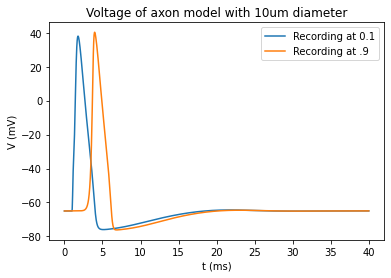

Max Voltage for V1 recorded at 0.1 37.96880954762335
Max voltage for V2 recorded at 0.9 40.2882095849558
Index of max voltage 1: 72
Voltage at max voltage 1: 37.96880954762335
Index of max voltage 2: 159
Voltage at max voltage 2: 40.2882095849558

Time of max voltage 1 1.7999999999999956
Time of max voltage 2 3.9750000000000227
Time between max voltages of axon 1: 2.1750000000000274



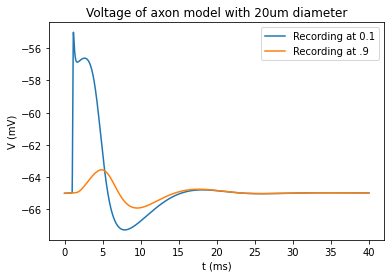

Max Voltage for V3 recorded at 0.1 -55.00612083772885
Max voltage for V4 recorded at 0.9 -63.543014198282314
Index of max voltage 3: 47
Voltage at max voltage 3: -55.00612083772885
Index of max voltage 4: 195
Voltage at max voltage 4: -63.543014198282314

Time of max voltage 3 1.1749999999999978
Time of max voltage 4 4.8750000000000355
Time between max voltages of axon 2: 3.7000000000000375



In [ ]:
#plt.figure()
plt.plot(t, v1)
plt.plot(t, v2)
plt.xlabel('t (ms)')
plt.ylabel('V (mV)')
plt.title("Voltage of axon model with 10um diameter")
plt.legend(['Recording at 0.1', 'Recording at .9'])
plt.show()
print("Max Voltage for V1 recorded at 0.1", max(v1))
print("Max voltage for V2 recorded at 0.9", max(v2))
maxVoltage1 = max(v1)
maxVoltage2 = max(v2)
timeMaxVoltage1 = 0
timeMaxVoltage2 = 0
for x in range(len(v1)):
  if v1[x] == maxVoltage1:
    print("Index of max voltage 1:", x)
    print("Voltage at max voltage 1:", v1[x])
    timeMaxVoltage1 = x
  if v2[x] == maxVoltage2:
    timeMaxVoltage2 = x
    print("Index of max voltage 2:", x)
    print("Voltage at max voltage 2:", v2[x])

print()
print("Time of max voltage 1", t[timeMaxVoltage1])
print("Time of max voltage 2", t[timeMaxVoltage2])
print("Time between max voltages of axon 1:",  t[timeMaxVoltage2] - t[timeMaxVoltage1])
print()



plt.figure()
plt.plot(t2, v3)
plt.plot(t2, v4)
plt.xlabel('t (ms)')
plt.ylabel('V (mV)')
plt.title("Voltage of axon model with 20um diameter")
plt.legend(['Recording at 0.1', 'Recording at .9'])
plt.show()

print("Max Voltage for V3 recorded at 0.1", max(v3))
print("Max voltage for V4 recorded at 0.9", max(v4))
maxVoltage3 = max(v3)
maxVoltage4 = max(v4)
timeMaxVoltage3 = 0
timeMaxVoltage4 = 0
for x in range(len(v3)):
  if v3[x] == maxVoltage3:
    print("Index of max voltage 3:", x)
    print("Voltage at max voltage 3:", v3[x])
    timeMaxVoltage3 = x
  if v4[x] == maxVoltage4:
    timeMaxVoltage4 = x
    print("Index of max voltage 4:", x)
    print("Voltage at max voltage 4:", v4[x])

print()
print("Time of max voltage 3", t[timeMaxVoltage3])
print("Time of max voltage 4", t[timeMaxVoltage4])
print("Time between max voltages of axon 2:",  t[timeMaxVoltage4] - t[timeMaxVoltage3])
print()



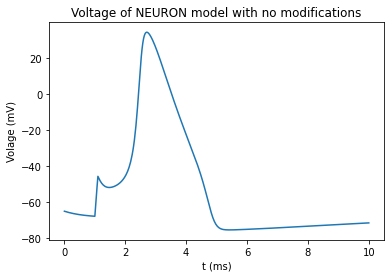

Minimum non-mylinated value: -0.12994448913935763
Minimum Soma: -0.014862253323731506
Difference between soma and non-mylinated value -0.11508223581562613
Minimum non-mylinated value: -104.45457814978124
Minimum Soma: -2.7784609956392962e-08
Difference between soma and non-mylinated value -104.45457812199663


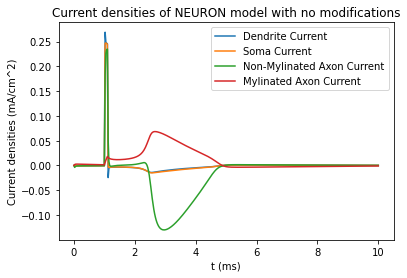

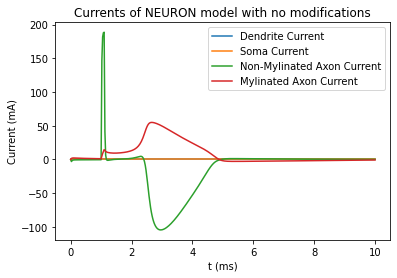

In [ ]:
soma = h.Section(name = 'soma')
soma.L = 24 * um
soma.diam = 21 * um
#soma.diam = 21 * .5 * um
soma.nseg = 100
soma.insert('hh')
soma.insert('pas')
soma.insert('extracellular')

dendrite = h.Section(name = 'dendrite')
dendrite.L = 50 * um
dendrite.diam = 12 * um
#dendrite.diam = 12 * um *.5
dendrite.nseg = 222
dendrite.insert('hh')
dendrite.insert('pas')
dendrite.insert('extracellular')

nonMylinatedAxon = h.Section(name = 'nonMylinatedAxon')
nonMylinatedAxon.L = 16 * um
nonMylinatedAxon.diam = 1 * um
#nonMylinatedAxon.diam = 1 * um *.5
nonMylinatedAxon.nseg = 100
nonMylinatedAxon.insert('hh')
nonMylinatedAxon.insert('pas')
nonMylinatedAxon.insert('extracellular')


mylinatedAxon = h.Section(name = 'mylinatedAxon')
mylinatedAxon.L = 300 * um
mylinatedAxon.diam = 1 * um
#mylinatedAxon.diam = 1 * um *.5
mylinatedAxon.nseg = 100
mylinatedAxon.insert('pas')
mylinatedAxon.insert('extracellular')
mylinatedAxon.cm = 0.04

axonHillock = h.Section(name = 'axonHillock')
axonHillock.L = 16 * um
axonHillock.nseg = 9

diams = np.arange(1, 21, 2.22222222)
diams = diams[::-1]
for i in range(0,10):
  axonHillock(0.1 * i).diam = diams[i] * um
  #axonHillock(0.1 * i).diam = diams[i] * um * .5


axonHillock.insert('hh')
axonHillock.insert('pas')
axonHillock.insert('extracellular')

dendrite.connect(soma)
soma.connect(axonHillock)
axonHillock.connect(nonMylinatedAxon)
nonMylinatedAxon.connect(mylinatedAxon)

'''
for seg in nonMylinatedAxon:
  seg.hh.gnabar = seg.hh.gnabar * 10
  seg.hh.gkbar = seg.hh.gkbar * 10
'''

iclamp = h.IClamp(dendrite(0.5))
iclamp.delay = 1
iclamp.dur = 0.1
iclamp.amp = 10
#iclamp.amp = 5
voltage = h.Vector().record(soma(.1)._ref_v)

curDend = h.Vector().record(dendrite(0.5)._ref_i_membrane)
curSoma = h.Vector().record(soma(0.5)._ref_i_membrane)
curNonMylinated = h.Vector().record(nonMylinatedAxon()._ref_i_membrane)
curMylinated = h.Vector().record(mylinatedAxon(0.5)._ref_i_membrane)

time = h.Vector().record(h._ref_t)
h.finitialize(-65 * mV)
h.continuerun(10 * ms)

plt.plot(time, voltage)
plt.xlabel('t (ms)')
plt.ylabel('Volage (mV)')
#plt.title("Voltage of NEURON model with no modifications")
plt.title("Voltage of NEURON model with no modifications")
plt.show()

plt.figure()
plt.plot(time, curDend)
plt.plot(time, curSoma)
plt.plot(time, curNonMylinated)
plt.plot(time, curMylinated)
plt.legend(['Dendrite Current','Soma Current','Non-Mylinated Axon Current', 'Mylinated Axon Current'])
plt.xlabel('t (ms)')
plt.ylabel('Current densities (mA/cm^2)')
#plt.title("Current densities of NEURON model with no modifications")
plt.title("Current densities of NEURON model with no modifications")


plt.figure()
plt.plot(time, curDend * 3.14 * ((21/2 * um)**-4)**2)
plt.plot(time, curSoma * 3.14 * ((12/2 * um)**-4)**2)
plt.plot(time, curNonMylinated * 3.14 * ((1/2 * um)**-4)**2)
plt.plot(time, curMylinated* 3.14 * ((1/2 * um)**-4)**2)
plt.legend(['Dendrite Current','Soma Current','Non-Mylinated Axon Current', 'Mylinated Axon Current'])
plt.xlabel('t (ms)')
plt.ylabel('Current (mA)')
#plt.title("Current densities of NEURON model with length and diamter of comparments multiplied by 2")
plt.title("Currents of NEURON model with no modifications")

print("Minimum non-mylinated value:",min(curNonMylinated))
print("Minimum Soma:",min(curSoma))
print("Difference between soma and non-mylinated value", min(curNonMylinated) - min(curSoma))

print("Minimum non-mylinated value:",min(curNonMylinated * 3.14 * ((1/2 * um)**-4)**2))
print("Minimum Soma:",min(curSoma * 3.14 * ((12/2 * um)**-4)**2))
print("Difference between soma and non-mylinated value", min(curNonMylinated * 3.14 * ((1/2 * um)**-4)**2) - min(curSoma * 3.14 * ((12/2 * um)**-4)**2))

#Values without changing gnabar and gkbar
#Minimum non-mylinated value: -0.12994448913935763
#Minimum Soma: -0.014862253323731506
#Difference between soma and non-mylinated value -0.11508223581562613

#Values after changing gnabar and gkbar
#Minimum non-mylinated value: -2.9393391529476562
#Minimum Soma: -0.006718267180347251
#Difference between soma and non-mylinated value -2.932620885767309




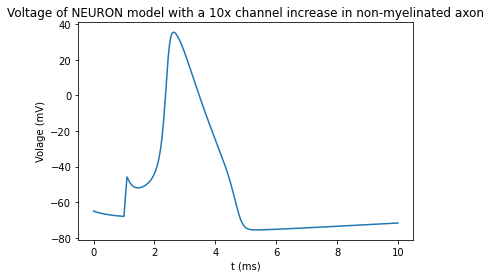

Minimum non-mylinated value: -2.939339152934377
Minimum Soma: -0.006718267180302079
Difference between soma and non-mylinated value -2.932620885754075


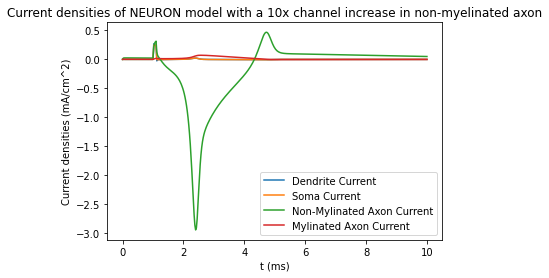

In [ ]:
soma = h.Section(name = 'soma')
soma.L = 24 * um
soma.diam = 21 * um
#soma.diam = 21 * .5 * um
soma.nseg = 100
soma.insert('hh')
soma.insert('pas')
soma.insert('extracellular')

dendrite = h.Section(name = 'dendrite')
dendrite.L = 50 * um
dendrite.diam = 12 * um
#dendrite.diam = 12 * um *.5
dendrite.nseg = 222
dendrite.insert('hh')
dendrite.insert('pas')
dendrite.insert('extracellular')

nonMylinatedAxon = h.Section(name = 'nonMylinatedAxon')
nonMylinatedAxon.L = 16 * um
nonMylinatedAxon.diam = 1 * um
#nonMylinatedAxon.diam = 1 * um *.5
nonMylinatedAxon.nseg = 100
nonMylinatedAxon.insert('hh')
nonMylinatedAxon.insert('pas')
nonMylinatedAxon.insert('extracellular')


mylinatedAxon = h.Section(name = 'mylinatedAxon')
mylinatedAxon.L = 300 * um
mylinatedAxon.diam = 1 * um
#mylinatedAxon.diam = 1 * um *.5
mylinatedAxon.nseg = 100
mylinatedAxon.insert('pas')
mylinatedAxon.insert('extracellular')
mylinatedAxon.cm = 0.04

axonHillock = h.Section(name = 'axonHillock')
axonHillock.L = 16 * um
axonHillock.nseg = 9

diams = np.arange(1, 21, 2.22222222)
diams = diams[::-1]
for i in range(0,10):
  axonHillock(0.1 * i).diam = diams[i] * um
  #axonHillock(0.1 * i).diam = diams[i] * um * .5


axonHillock.insert('hh')
axonHillock.insert('pas')
axonHillock.insert('extracellular')

dendrite.connect(soma)
soma.connect(axonHillock)
axonHillock.connect(nonMylinatedAxon)
nonMylinatedAxon.connect(mylinatedAxon)


for seg in nonMylinatedAxon:
  seg.hh.gnabar = seg.hh.gnabar * 10
  seg.hh.gkbar = seg.hh.gkbar * 10


iclamp = h.IClamp(dendrite(0.5))
iclamp.delay = 1
iclamp.dur = 0.1
iclamp.amp = 10
#iclamp.amp = 5
voltage = h.Vector().record(soma(.1)._ref_v)

curDend = h.Vector().record(dendrite(0.5)._ref_i_membrane)
curSoma = h.Vector().record(soma(0.5)._ref_i_membrane)
curNonMylinated = h.Vector().record(nonMylinatedAxon()._ref_i_membrane)
curMylinated = h.Vector().record(mylinatedAxon(0.5)._ref_i_membrane)

time = h.Vector().record(h._ref_t)
h.finitialize(-65 * mV)
h.continuerun(10 * ms)

plt.plot(time, voltage)
plt.xlabel('t (ms)')
plt.ylabel('Volage (mV)')
#plt.title("Voltage of NEURON model with no modifications")
plt.title("Voltage of NEURON model with a 10x channel increase in non-myelinated axon")
plt.show()

plt.figure()
plt.plot(time, curDend)
plt.plot(time, curSoma)
plt.plot(time, curNonMylinated)
plt.plot(time, curMylinated)
plt.legend(['Dendrite Current','Soma Current','Non-Mylinated Axon Current', 'Mylinated Axon Current'])
plt.xlabel('t (ms)')
plt.ylabel('Current densities (mA/cm^2)')
#plt.title("Current densities of NEURON model with no modifications")
plt.title("Current densities of NEURON model with a 10x channel increase in non-myelinated axon")


print("Minimum non-mylinated value:",min(curNonMylinated))
print("Minimum Soma:",min(curSoma))
print("Difference between soma and non-mylinated value", min(curNonMylinated) - min(curSoma))

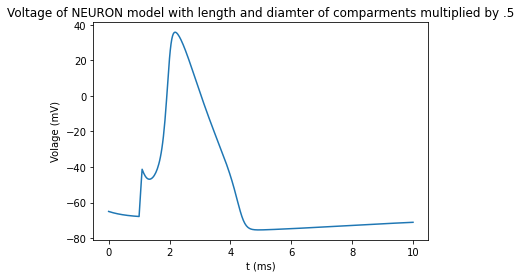

Minimum non-mylinated value: -0.09066162935252634
Minimum Soma: -0.018767316673306916
Difference between soma and non-mylinated value -0.07189431267921942
Minimum non-mylinated value: -72.87744413873477
Minimum Soma: -3.5085027979123624e-08
Difference between soma and non-mylinated value -72.87744410364975


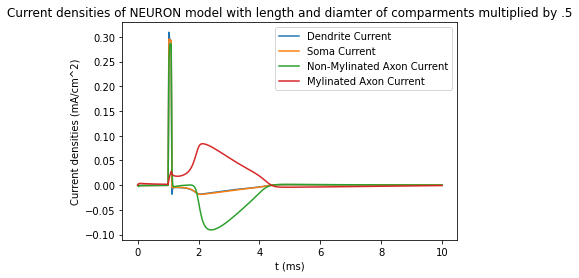

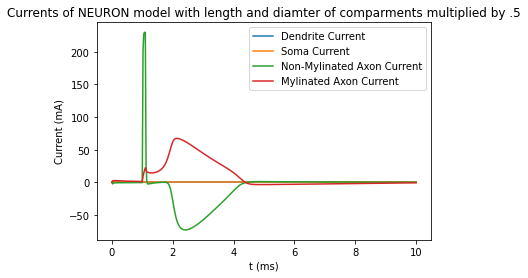

In [ ]:
soma = h.Section(name = 'soma')
soma.L = 24 * um * .5
soma.diam = 21 * um *.5
soma.nseg = 100
soma.insert('hh')
soma.insert('pas')
soma.insert('extracellular')

dendrite = h.Section(name = 'dendrite')
dendrite.L = 50 *  um *.5
dendrite.diam = 12 * um* .5
dendrite.nseg = 222
dendrite.insert('hh')
dendrite.insert('pas')
dendrite.insert('extracellular')

nonMylinatedAxon = h.Section(name = 'nonMylinatedAxon')
nonMylinatedAxon.L = 16 * um *.5
nonMylinatedAxon.diam = 1 * um *.5
nonMylinatedAxon.nseg = 100
nonMylinatedAxon.insert('hh')
nonMylinatedAxon.insert('pas')
nonMylinatedAxon.insert('extracellular')


mylinatedAxon = h.Section(name = 'mylinatedAxon')
mylinatedAxon.L = 300 * um * .5
mylinatedAxon.diam = 1 * um * .5
mylinatedAxon.nseg = 100
mylinatedAxon.insert('pas')
mylinatedAxon.insert('extracellular')
mylinatedAxon.cm = 0.04

axonHillock = h.Section(name = 'axonHillock')
axonHillock.L = 16 * um * .5
axonHillock.nseg = 9

diams = np.arange(1, 21, 2.22222222)
diams = diams[::-1]
for i in range(0,10):
  axonHillock(0.1 * i).diam = diams[i] * um * .5


axonHillock.insert('hh')
axonHillock.insert('pas')
axonHillock.insert('extracellular')

dendrite.connect(soma)
soma.connect(axonHillock)
axonHillock.connect(nonMylinatedAxon)
nonMylinatedAxon.connect(mylinatedAxon)

'''
for seg in nonMylinatedAxon:
  seg.hh.gnabar = seg.hh.gnabar * 10
  seg.hh.gkbar = seg.hh.gkbar * 10
'''

iclamp = h.IClamp(dendrite(0.5))
iclamp.delay = 1
iclamp.dur = 0.1
#iclamp.amp = 10
iclamp.amp = 3
voltage = h.Vector().record(soma(.1)._ref_v)

curDend = h.Vector().record(dendrite(0.5)._ref_i_membrane)
curSoma = h.Vector().record(soma(0.5)._ref_i_membrane)
curNonMylinated = h.Vector().record(nonMylinatedAxon()._ref_i_membrane)
curMylinated = h.Vector().record(mylinatedAxon(0.5)._ref_i_membrane)

time = h.Vector().record(h._ref_t)
h.finitialize(-65 * mV)
h.continuerun(10 * ms)

plt.plot(time, voltage)
plt.xlabel('t (ms)')
plt.ylabel('Volage (mV)')
plt.title("Voltage of NEURON model with length and diamter of comparments multiplied by .5")
#plt.title("Voltage of NEURON model with a 10x channel increase in non-myelinated axon")
plt.show()

plt.figure()
plt.plot(time, curDend)
plt.plot(time, curSoma)
plt.plot(time, curNonMylinated)
plt.plot(time, curMylinated)
plt.legend(['Dendrite Current','Soma Current','Non-Mylinated Axon Current', 'Mylinated Axon Current'])
plt.xlabel('t (ms)')
plt.ylabel('Current densities (mA/cm^2)')
plt.title("Current densities of NEURON model with length and diamter of comparments multiplied by .5")
#plt.title("Current densities of NEURON model with a 10x channel increase in non-myelinated axon")


plt.figure()
plt.plot(time, curDend * 3.14 * ((21/2 * um)**-4)**2)
plt.plot(time, curSoma * 3.14 * ((12/2 * um)**-4)**2)
plt.plot(time, curNonMylinated * 3.14 * ((1/2 * um)**-4)**2)
plt.plot(time, curMylinated* 3.14 * ((1/2 * um)**-4)**2)
plt.legend(['Dendrite Current','Soma Current','Non-Mylinated Axon Current', 'Mylinated Axon Current'])
plt.xlabel('t (ms)')
plt.ylabel('Current (mA)')
#plt.title("Current densities of NEURON model with length and diamter of comparments multiplied by 2")
plt.title("Currents of NEURON model with length and diamter of comparments multiplied by .5")

print("Minimum non-mylinated value:",min(curNonMylinated))
print("Minimum Soma:",min(curSoma))
print("Difference between soma and non-mylinated value", min(curNonMylinated) - min(curSoma))

print("Minimum non-mylinated value:",min(curNonMylinated * 3.14 * ((1/2 * um)**-4)**2))
print("Minimum Soma:",min(curSoma * 3.14 * ((12/2 * um)**-4)**2))
print("Difference between soma and non-mylinated value", min(curNonMylinated * 3.14 * ((1/2 * um)**-4)**2) - min(curSoma * 3.14 * ((12/2 * um)**-4)**2))

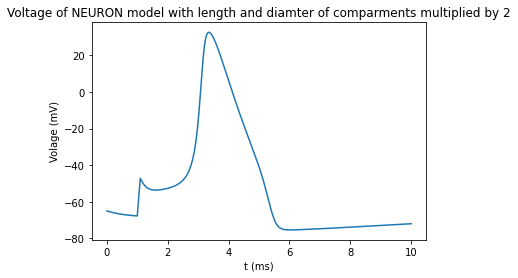

Minimum non-mylinated value: -0.17484425788100127
Minimum Soma: -0.010681682163526052
Difference between soma and non-mylinated value -0.16416257571747522
Minimum non-mylinated value: -140.54680825506406
Minimum Soma: -1.9969136989330772e-08
Difference between soma and non-mylinated value -140.54680823509491


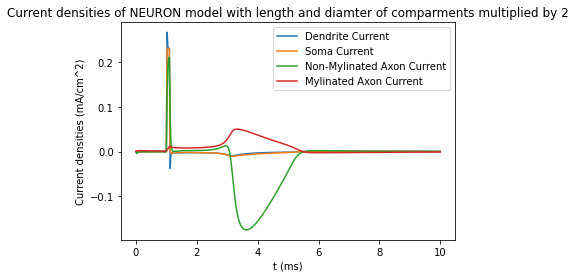

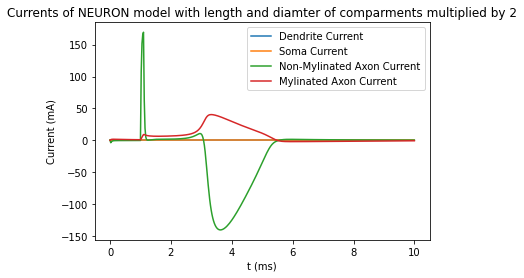

In [ ]:
soma = h.Section(name = 'soma')
soma.L = 24 * um * 2
soma.diam = 21 * um * 2
soma.nseg = 100
soma.insert('hh')
soma.insert('pas')
soma.insert('extracellular')

dendrite = h.Section(name = 'dendrite')
dendrite.L = 50 *  um * 2
dendrite.diam = 12 * um* 2
dendrite.nseg = 222
dendrite.insert('hh')
dendrite.insert('pas')
dendrite.insert('extracellular')

nonMylinatedAxon = h.Section(name = 'nonMylinatedAxon')
nonMylinatedAxon.L = 16 * um * 2
nonMylinatedAxon.diam = 1 * um * 2
nonMylinatedAxon.nseg = 100
nonMylinatedAxon.insert('hh')
nonMylinatedAxon.insert('pas')
nonMylinatedAxon.insert('extracellular')


mylinatedAxon = h.Section(name = 'mylinatedAxon')
mylinatedAxon.L = 300 * um * 2
mylinatedAxon.diam = 1 * um * 2
mylinatedAxon.nseg = 100
mylinatedAxon.insert('pas')
mylinatedAxon.insert('extracellular')
mylinatedAxon.cm = 0.04

axonHillock = h.Section(name = 'axonHillock')
axonHillock.L = 16 * um * 2
axonHillock.nseg = 9

diams = np.arange(1, 21, 2.22222222)
diams = diams[::-1]
for i in range(0,10):
  axonHillock(0.1 * i).diam = diams[i] * um * 2


axonHillock.insert('hh')
axonHillock.insert('pas')
axonHillock.insert('extracellular')

dendrite.connect(soma)
soma.connect(axonHillock)
axonHillock.connect(nonMylinatedAxon)
nonMylinatedAxon.connect(mylinatedAxon)

'''
for seg in nonMylinatedAxon:
  seg.hh.gnabar = seg.hh.gnabar * 10
  seg.hh.gkbar = seg.hh.gkbar * 10
'''

iclamp = h.IClamp(dendrite(0.5))
iclamp.delay = 1
iclamp.dur = 0.1
#iclamp.amp = 10
iclamp.amp = 37
voltage = h.Vector().record(soma(.1)._ref_v)

curDend = h.Vector().record(dendrite(0.5)._ref_i_membrane)
curSoma = h.Vector().record(soma(0.5)._ref_i_membrane)
curNonMylinated = h.Vector().record(nonMylinatedAxon()._ref_i_membrane)
curMylinated = h.Vector().record(mylinatedAxon(0.5)._ref_i_membrane)

time = h.Vector().record(h._ref_t)
h.finitialize(-65 * mV)
h.continuerun(10 * ms)

plt.plot(time, voltage)
plt.xlabel('t (ms)')
plt.ylabel('Volage (mV)')
#plt.title("Voltage of NEURON model with length and diamter of comparments multiplied by 2")
plt.title("Voltage of NEURON model with length and diamter of comparments multiplied by 2")
plt.show()

plt.figure()
plt.plot(time, curDend)
plt.plot(time, curSoma)
plt.plot(time, curNonMylinated)
plt.plot(time, curMylinated)
plt.legend(['Dendrite Current','Soma Current','Non-Mylinated Axon Current', 'Mylinated Axon Current'])
plt.xlabel('t (ms)')
plt.ylabel('Current densities (mA/cm^2)')
#plt.title("Current densities of NEURON model with length and diamter of comparments multiplied by 2")
plt.title("Current densities of NEURON model with length and diamter of comparments multiplied by 2")

plt.figure()
plt.plot(time, curDend * 3.14 * ((21/2 * um)**-4)**2)
plt.plot(time, curSoma * 3.14 * ((12/2 * um)**-4)**2)
plt.plot(time, curNonMylinated * 3.14 * ((1/2 * um)**-4)**2)
plt.plot(time, curMylinated* 3.14 * ((1/2 * um)**-4)**2)
plt.legend(['Dendrite Current','Soma Current','Non-Mylinated Axon Current', 'Mylinated Axon Current'])
plt.xlabel('t (ms)')
plt.ylabel('Current (mA)')
#plt.title("Current densities of NEURON model with length and diamter of comparments multiplied by 2")
plt.title("Currents of NEURON model with length and diamter of comparments multiplied by 2")

print("Minimum non-mylinated value:",min(curNonMylinated))
print("Minimum Soma:",min(curSoma))
print("Difference between soma and non-mylinated value", min(curNonMylinated) - min(curSoma))

print("Minimum non-mylinated value:",min(curNonMylinated * 3.14 * ((1/2 * um)**-4)**2))
print("Minimum Soma:",min(curSoma * 3.14 * ((12/2 * um)**-4)**2))
print("Difference between soma and non-mylinated value", min(curNonMylinated * 3.14 * ((1/2 * um)**-4)**2) - min(curSoma * 3.14 * ((12/2 * um)**-4)**2))